In [1]:
!pip install spacy==2.2.3

  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached wasabi-0.10.1-py3-none-any.whl (26 kB)
  Using cached certifi-2022.9.24-py3-none-any.whl (161 kB)
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)


You should consider upgrading via the 'E:\GITHUB\RNA\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [14]:
!python -m spacy download pt_core_news_sm

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
[+] Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')


You should consider upgrading via the 'E:\GITHUB\RNA\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import string
import spacy
import random
import numpy as np

In [6]:
base_dados = pd.read_csv('./data/base_treinamento.txt', encoding = 'utf-8')

In [7]:
base_dados

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
...,...,...
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo


In [10]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [18]:
import pt_core_news_sm
pln = pt_core_news_sm.load()

In [19]:
def preprocessamento(texto):
  texto = texto.lower()
  documento = pln(texto)

  lista = []
  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [20]:
teste = preprocessamento('Estou aPrendendo 1 10 23 processamento de linguagem natural, Curso em Curitiba')
teste

'aprender processamento linguagem natural cursar curitiba'

In [21]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

In [22]:
base_dados_final = []
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  #print(texto, emocao)
  if emocao == 'alegria':
    dic = ({'ALEGRIA': True, 'MEDO': False})
  elif emocao == 'medo':
    dic = ({'ALEGRIA': False, 'MEDO': True})

  base_dados_final.append([texto, dic.copy()])

In [23]:
base_dados_final[0]

['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}]

In [24]:
base_dados_final

[['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gostar ficar o aconchegar', {'ALEGRIA': True, 'MEDO': False}],
 ['o adesão o o cursar hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar comer', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelar maciar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar o cor olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somar amável o outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir umar afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['o dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixonar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir hoje'

## classificador

In [25]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe("textcat")
categorias.add_label("ALEGRIA")
categorias.add_label("MEDO")
modelo.add_pipe(categorias)
historico = []

In [26]:
modelo.begin_training()
for epoca in range(1000):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses=losses)
  if epoca % 100 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 0.006535151100251824}
{'textcat': 1.6112404388479717e-07}
{'textcat': 5.051674922817995e-08}
{'textcat': 2.6972716726803014e-08}
{'textcat': 1.2982691588447892e-08}
{'textcat': 8.317084576603406e-09}
{'textcat': 7.596797774178654e-09}
{'textcat': 4.462982206021593e-09}
{'textcat': 3.5257322339443675e-09}
{'textcat': 3.56662030465138e-09}


In [27]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [28]:
historico_loss = np.array(historico_loss)
historico_loss

array([6.53515110e-03, 1.61124044e-07, 5.05167492e-08, 2.69727167e-08,
       1.29826916e-08, 8.31708458e-09, 7.59679777e-09, 4.46298221e-09,
       3.52573223e-09, 3.56662030e-09])

Text(0, 0.5, 'Erro')

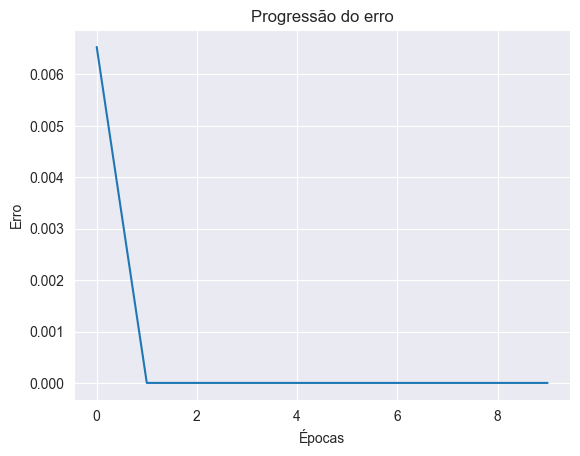

In [29]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

## salva o modelo com as categorias alegria e medo

In [30]:
modelo.to_disk("./data/modelo_alegria_medo.model")

## Importando o modelo

In [31]:
modelo_carregado = spacy.load("./data/modelo_alegria_medo.model")
modelo_carregado

In [32]:
texto_positivo = 'eu adoro cor dos seus olhos'

In [33]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'adorar cor olho'

In [34]:
previsao = modelo_carregado(texto_positivo)
previsao

adorar cor olho

In [35]:
previsao.cats

{'ALEGRIA': 0.9971259236335754, 'MEDO': 0.0006870364886708558}

In [36]:
texto_negativo = 'estou com medo dele'
previsao = modelo_carregado(preprocessamento(texto_negativo))
previsao.cats

{'ALEGRIA': 0.002741253701969981, 'MEDO': 0.9987145662307739}

## Avaliação de modelo

In [37]:
previsoes = []
for texto in base_dados['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [38]:
previsoes

[{'ALEGRIA': 0.9996316432952881, 'MEDO': 0.00011928264575544745},
 {'ALEGRIA': 0.9994291663169861, 'MEDO': 0.0005649746162816882},
 {'ALEGRIA': 0.9995737671852112, 'MEDO': 0.00021485413890331984},
 {'ALEGRIA': 0.9995716214179993, 'MEDO': 0.00038138628588058054},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 7.42098709451966e-05},
 {'ALEGRIA': 0.9999289512634277, 'MEDO': 0.00022232496121432632},
 {'ALEGRIA': 0.9998327493667603, 'MEDO': 0.000332310184603557},
 {'ALEGRIA': 0.999748170375824, 'MEDO': 0.0005825523403473198},
 {'ALEGRIA': 0.9997745156288147, 'MEDO': 0.00015310638991650194},
 {'ALEGRIA': 0.9991899132728577, 'MEDO': 0.00022958395129535347},
 {'ALEGRIA': 0.9998985528945923, 'MEDO': 0.00019359066209290177},
 {'ALEGRIA': 0.9999144077301025, 'MEDO': 0.0001801744510885328},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 0.00011279372847639024},
 {'ALEGRIA': 0.9996888637542725, 'MEDO': 0.0002666176587808877},
 {'ALEGRIA': 0.9986627101898193, 'MEDO': 0.001504047540947795},
 {'ALEGRIA': 0.999941

In [39]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [40]:
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [41]:
respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

1.0

In [43]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]], dtype=int64)

## testando o modelo

In [48]:
base_dados_teste = pd.read_csv('./data/base_teste.txt', encoding = 'utf-8')

In [49]:
base_dados_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [50]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)

In [51]:
previsoes = []
for texto in base_dados_teste['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [52]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [53]:
respostas_reais = base_dados_teste['emocao'].values

In [54]:
accuracy_score(respostas_reais, previsoes_final)

0.5714285714285714

In [55]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[36, 12],
       [24, 12]], dtype=int64)